In [1]:
#import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
db=pd.read_csv("drive/MyDrive/Colab Notebooks/dataset casestudy/diabetes.csv")

In [3]:
#first five values of data
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#in total 9 columns we have 7 int and 2 float column
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**check the null values**



In [5]:
db.isnull().sum()/len(db)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

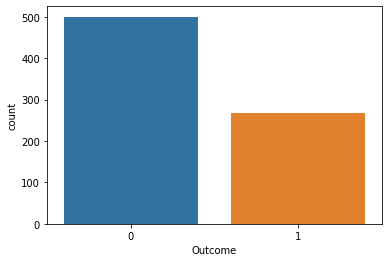

In [6]:
sns.countplot(x=db["Outcome"])

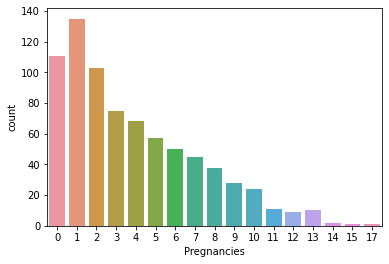

In [7]:
sns.countplot(x=db["Pregnancies"])

**removing outlier**

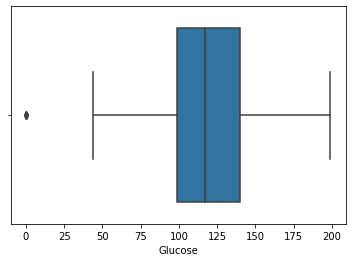

In [8]:

sns.boxplot(x=db["Glucose"])

In [9]:
db.drop(db[db["Glucose"]<50].index,inplace=True)

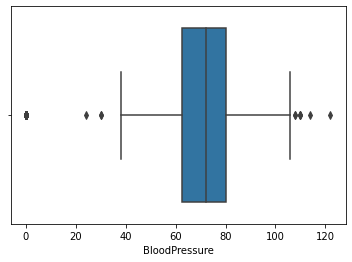

In [10]:
sns.boxplot(x=db["BloodPressure"])


In [11]:
db.drop(db[db["BloodPressure"]<30].index,inplace=True)

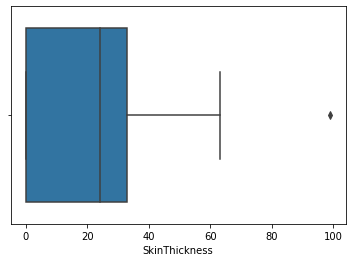

In [12]:
sns.boxplot(x=db["SkinThickness"])

In [13]:
db.drop(db[db["BloodPressure"]>80].index,inplace=True)

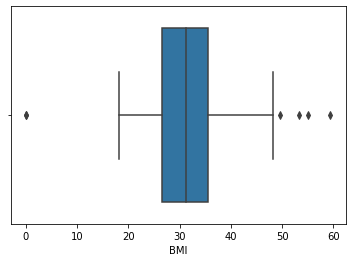

In [14]:
sns.boxplot(x=db["BMI"])

In [15]:
db.drop(db[db["BloodPressure"]<10].index,inplace=True)

average of BloodPressure level with Age 

In [16]:
#avg bloodpressure of more than 30 age.
db.BloodPressure[(db["Age"]>=30)].mean()

70.45934959349593

In [17]:
#avg bloodpressure of more than 50 age.
db.BloodPressure[(db["Age"]>=50)].mean()

72.5576923076923

In [18]:
#avg bloodpressure of less than 30 age.
db.BloodPressure[(db["Age"]<30)].mean()

65.53968253968254

**blood pressure avg with BMI and age**

In [19]:
#avg with less than 30 age and less than 25 BMI
db.BloodPressure[(db["BMI"]<25)&(db["Age"]<30)].mean()


63.206896551724135

In [20]:
#avg with more than 30 age and less than 25 BMI
db.BloodPressure[(db["BMI"]<25)&(db["Age"]>30)].mean()

68.41935483870968

In [21]:
#avg with less than 30 age and more than 25 BMI
db.BloodPressure[(db["BMI"]>25)&(db["Age"]<30)].mean()

66.0748031496063

In [22]:
#avg with less than 30 age and less than 25 BMI
db.BloodPressure[(db["BMI"]>25)&(db["Age"]>30)].mean()

70.92929292929293

**count** **wise** analysis

In [23]:
#pepole count with diabetes and high glucose level.
db.Age[(db["Outcome"]==1)&(db["Glucose"]>120)].count()

124

In [24]:
#pepole count with normal and high glucose level.
db.Age[(db["Outcome"]==0)&(db["Glucose"]>120)].count()

105

In [25]:
#pepole count with diabetes and low glucose level.
db.Age[(db["Outcome"]==1)&(db["Glucose"]>80)].count()

172

In [26]:
#pepole count with normal and low glucose level.
db.Age[(db["Outcome"]==0)&(db["Glucose"]>80)].count()

357

In [27]:

#count with less than 30 age and less than 25 BMI
db.BloodPressure[(db["BMI"]<25)&(db["Age"]<30)].count()

58

**visual analysis**

Text(0.5, 1.0, 'age wise with high glucose and diabetes')

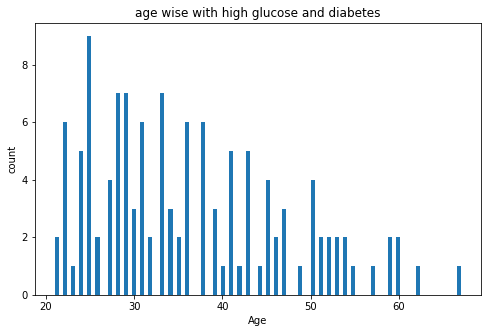

In [28]:
plt.figure(figsize=(8,5))
db.Age[(db["Outcome"]==1)&(db["Glucose"]>120)].plot(kind="hist",bins=100)
plt.xlabel("Age")
plt.ylabel("count")
plt.title("age wise with high glucose and diabetes")

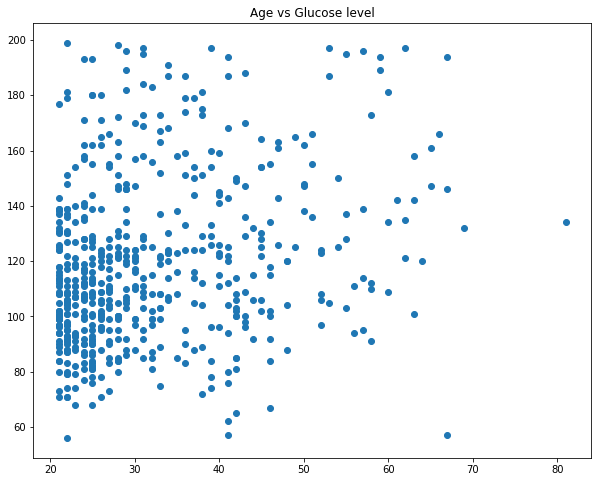

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(db['Age'],db['Glucose'])
plt.title('Age vs Glucose level')
plt.show()

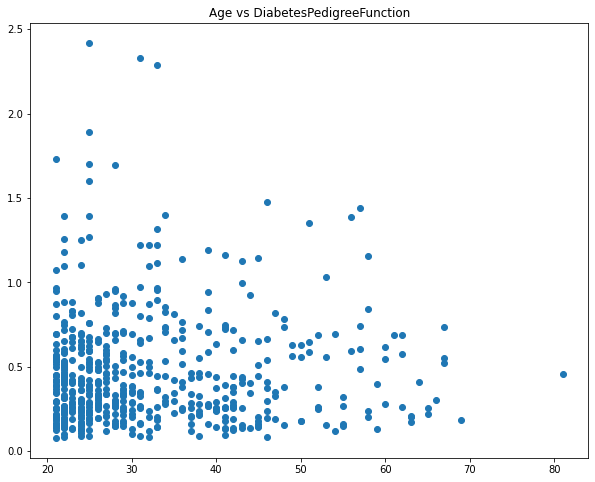

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(db['Age'],db['DiabetesPedigreeFunction'])
plt.title('Age vs DiabetesPedigreeFunction')
plt.show()

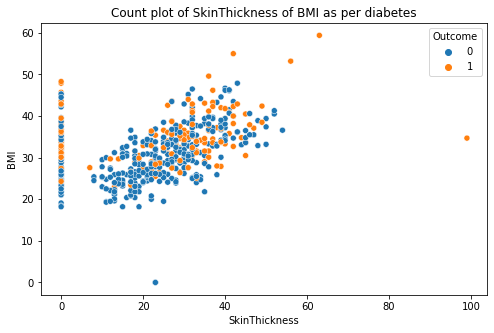

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(db['SkinThickness'],db['BMI'],hue=db['Outcome'])
plt.title('Count plot of SkinThickness of BMI as per diabetes')
plt.show()

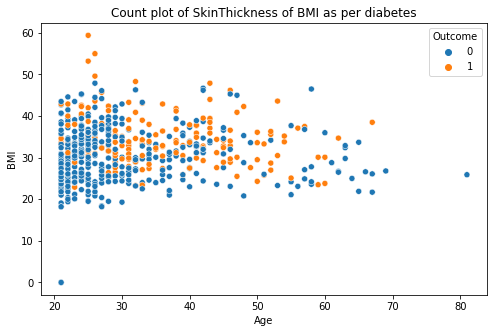

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(db['Age'],db['BMI'],hue=db['Outcome'])
plt.title('Count plot of SkinThickness of BMI as per diabetes')
plt.show()

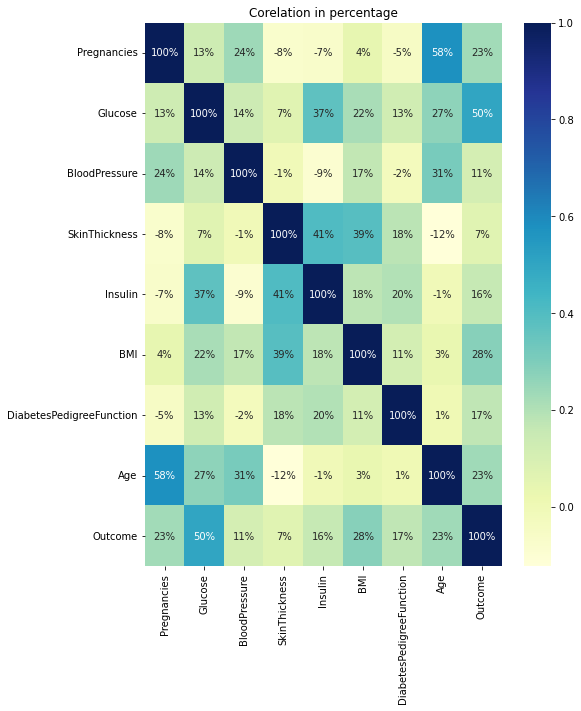

In [33]:
plt.figure(figsize=(8,10))
cor = db.corr()
sns.heatmap(cor,annot=True,cmap='YlGnBu',fmt='.0%')
plt.title('Corelation in percentage')
plt.show()

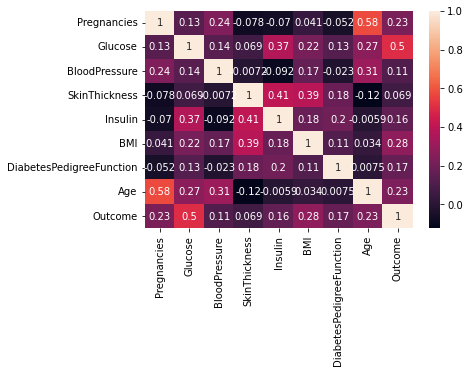

In [34]:
sns.heatmap(cor,annot=True)
plt.show()

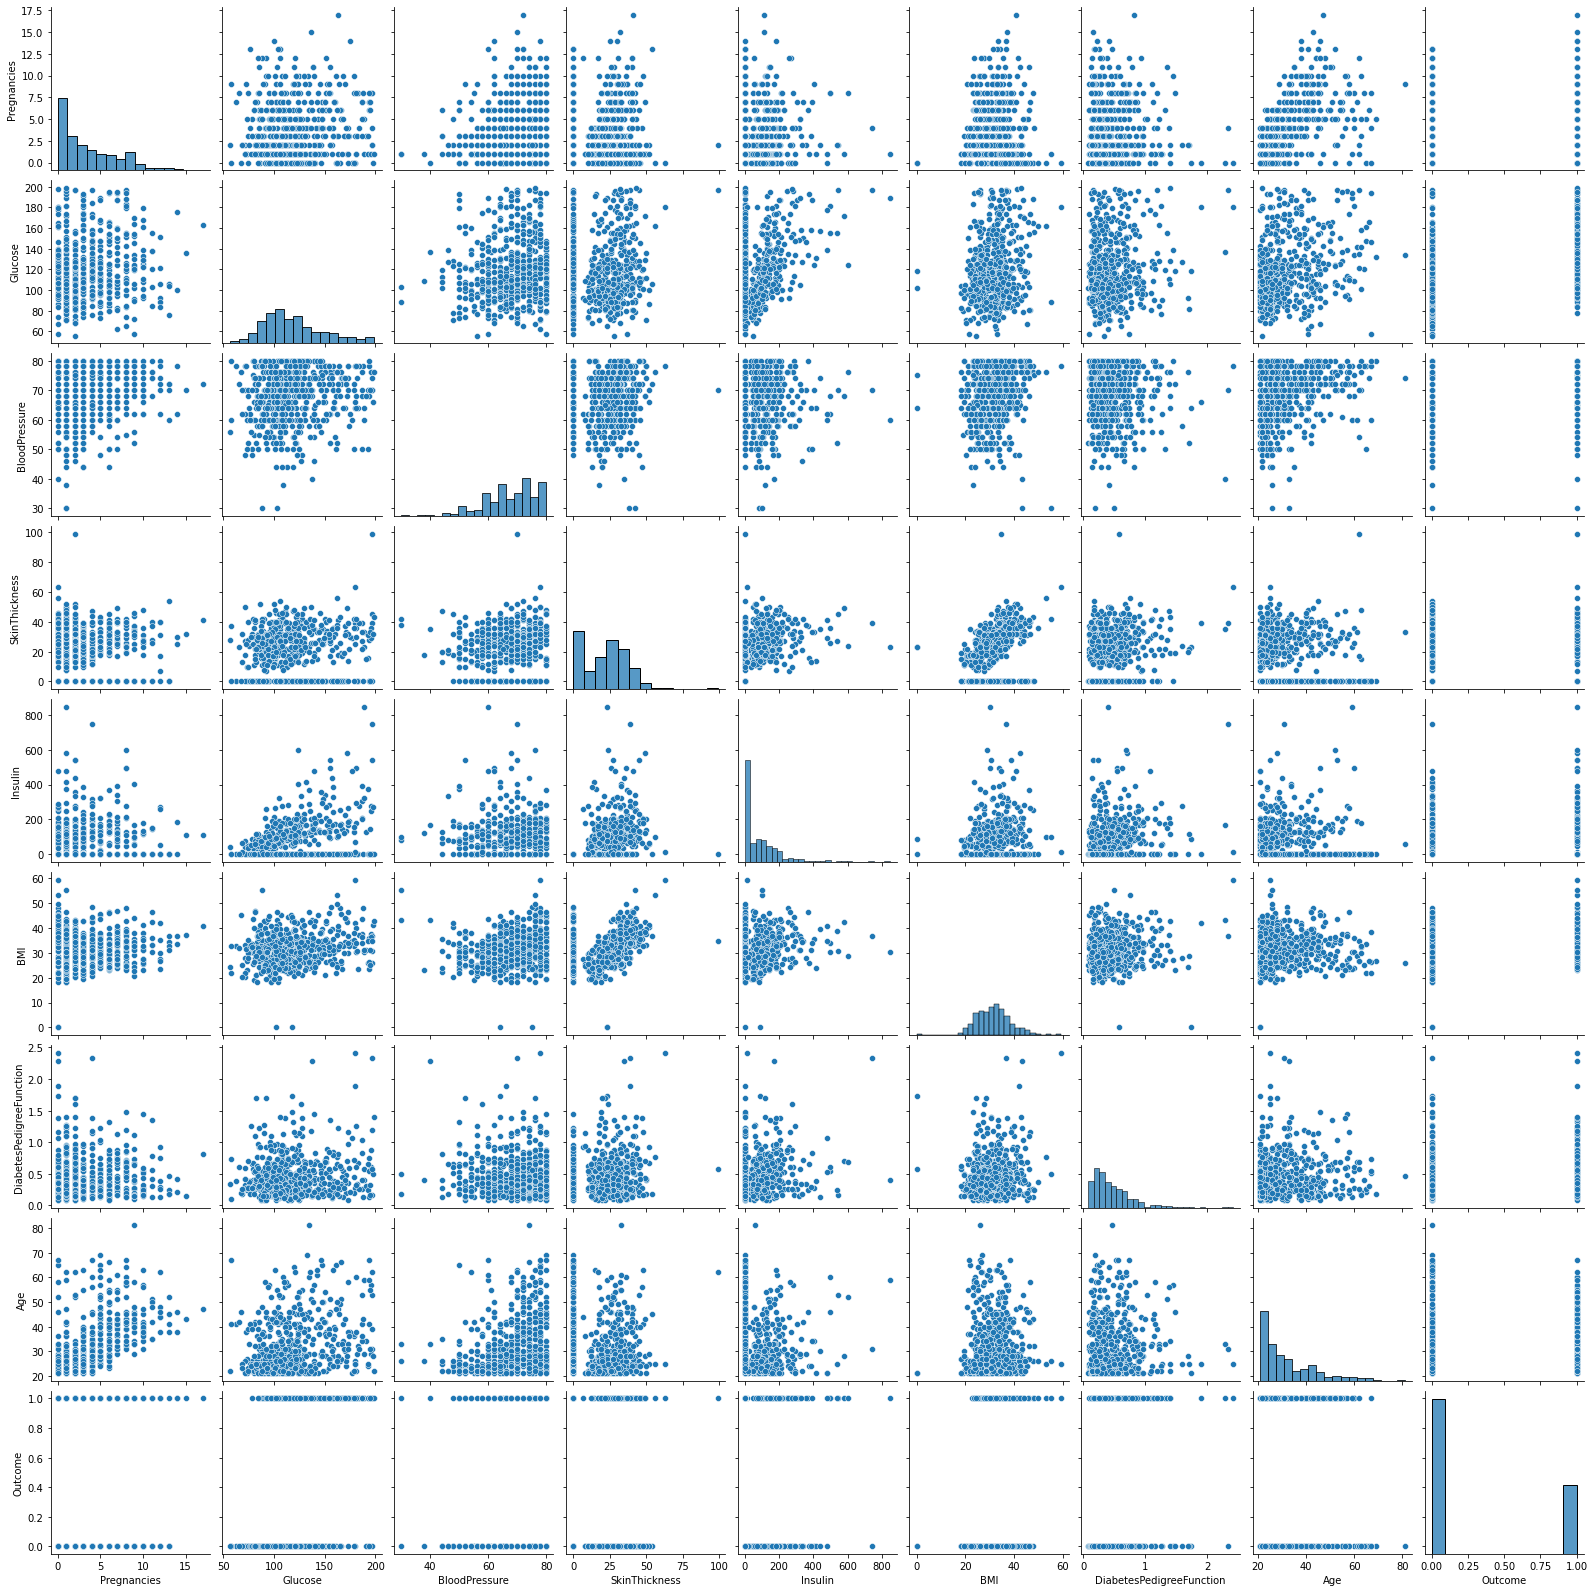

In [35]:
sns.pairplot(data=db)
plt.show()

**Top 10 values in the data as per column**

In [36]:
db['Glucose'][:10].sort_values(ascending=True)



6      78
1      85
3      89
5     116
4     137
12    139
0     148
11    168
2     183
8     197
Name: Glucose, dtype: int64

In [37]:
db['BMI'][:10].sort_values(ascending=True)

2     23.3
5     25.6
1     26.6
12    27.1
3     28.1
8     30.5
6     31.0
0     33.6
11    38.0
4     43.1
Name: BMI, dtype: float64